In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from bs4 import BeautifulSoup
import requests
import sklearn as sk

# To compile the full Premier League team urls into a list

In [3]:
def get_Team_urls(league_url, base_url, tail):
    """
    Compile a list of all teams-links in tournament for the season
    """
    url = league_url
    response = requests.get(url)
    feedback = response.status_code
    page = response.text
    soup = BeautifulSoup(page, 'html.parser') # Create BeautifulSoup object for our scrape-job
    stub_list = []
    full_url_list = []
    #Iterate each row in the table, avoiding the first two headers and pick up all the url links
    for link in soup.find(id = 'stats_squads_shooting_for').find_all('tr')[2:]: 
        stub_list.append(link.find('a').get('href'))
    for link in stub_list:
        full_url_list.append(base_url+link+tail)
    print('Feedback:{}'.format(feedback))
    return full_url_list

In [4]:
#league_url = "https://fbref.com/en/comps/9/3232/2019-2020-Premier-League"
#base_url = "https://fbref.com"
#tail = "#all_stats_shooting"

In [5]:
#url_list = get_Team_urls(league_url, base_url, tail)

Pass the full Premier League urls to a function that will scrape Premier League Squad stats and pass them to a Panda DataFrame

In [6]:
def get_team_stats(url_list, i):
    stats_file = [3232, 3239, 3248, 3243, 3260]
    FULLsquad_df = pd.DataFrame({}) 
    for link in url_list:
        url = link
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, 'html.parser')
        stats_table = soup.find(id = f"stats_shooting_{stats_file[i]}")
        stats = stats_table.find('tbody').find_all('tr')
        stats_dic = {}
        for item in stats[:-2]:
            try:
                item_data = []
                data = item.find_all('td')
                for data_entry in data:
                    item_data.append(data_entry.text)
                stats_dic[item.find('th').text] = item_data
            except:
                print('Got an error here!')
        stats_df = pd.DataFrame.from_dict(stats_dic,orient = 'index')
        FULLsquad_df = pd.concat([FULLsquad_df, stats_df], axis = 0)
    return FULLsquad_df
    
                

In [7]:
#PL_stats = get_team_stats(url_list,0)

In [8]:
#PL_stats.to_csv('pl_stats.csv')

In [9]:
PL_stats = pd.read_csv('pl_stats.csv')

In [10]:
PL_stats.head()

Unnamed: 0       0   1   2     3   4   5   6     7     8  \
0  Pierre-Emerick Aubameyang  ga GAB  FW  30  34.8  22  90  40  44.4  2.58   
1                 David Luiz  br BRA  DF  32  31.2   2  23   7  30.4  0.74   
2                 Bernd Leno  de GER  GK  27  29.4   0   0   0   NaN  0.00   
3               Granit Xhaka  ch SUI  MF  26  28.7   1  11   3  27.3  0.38   
4               Nicolas Pépé  ci CIV  FW  24  22.3   5  49  16  32.7  2.19   

   ...    12  13  14  15    16    17    18   19   20       21  
0  ...  15.3   2   2   2  15.8  14.3  0.16  6.2  5.7  Matches  
1  ...  20.1   7   0   0   1.9   1.9  0.08  0.1  0.1  Matches  
2  ...   NaN   0   0   0   0.0   0.0   NaN  0.0  0.0  Matches  
3  ...  23.8   0   0   0   0.3   0.3  0.03  0.7  0.7  Matches  
4  ...  19.4   7   1   1   4.5   3.8  0.08  0.5  0.2  Matches  

[5 rows x 23 columns]

In [11]:
PL_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  482 non-null    object 
 1   0           482 non-null    object 
 2   1           482 non-null    object 
 3   2           482 non-null    int64  
 4   3           482 non-null    float64
 5   4           482 non-null    int64  
 6   5           482 non-null    int64  
 7   6           482 non-null    int64  
 8   7           421 non-null    float64
 9   8           482 non-null    float64
 10  9           482 non-null    float64
 11  10          421 non-null    float64
 12  11          360 non-null    float64
 13  12          421 non-null    float64
 14  13          482 non-null    int64  
 15  14          482 non-null    int64  
 16  15          482 non-null    int64  
 17  16          482 non-null    float64
 18  17          482 non-null    float64
 19  18          421 non-null    f

Now, let us use the functions to collect the 2019-2020 stats from the other 4 European Leagues

In [12]:
#Collecting Spanish La Liga 2019-2020 urls: https://fbref.com/en/comps/12/3239/2019-2020-La-Liga-Stats

#league_url = "https://fbref.com/en/comps/12/3239/2019-2020-La-Liga-Stats"

In [13]:
#laliga_urls = get_Team_urls(league_url,base_url, tail )

In [14]:
#To collect Spanish La Liga Stats 2019-20:
#url_list = laliga_urls
#LaLiga_stats = get_team_stats(url_list,1)

In [15]:
#LaLiga_stats.to_csv('laliga_stats.csv')

In [16]:
LaLiga_stats = pd.read_csv('laliga_stats.csv')

In [17]:
LaLiga_stats.head()

Unnamed: 0       0   1   2     3   4   5   6     7     8  ...    12  \
0            Joselu  es ESP  FW  29  30.9  11  81  28  34.6  2.62  ...  13.2   
1  Víctor Laguardia  es ESP  DF  29  29.5   1   8   1  12.5  0.27  ...  14.8   
2      Rubén Duarte  es ESP  DF  23  29.6   0  20   8  40.0  0.68  ...  17.3   
3       Lucas Pérez  es ESP  FW  30  27.7  11  43  14  32.6  1.55  ...  17.7   
4  Fernando Pacheco  es ESP  GK  27  26.2   0   0   0   NaN  0.00  ...   NaN   

   13  14  15    16   17    18   19   20       21  
0   1   1   1  10.5  9.8  0.12  0.5  0.2  Matches  
1   0   0   0   0.8  0.8  0.10  0.2  0.2  Matches  
2   0   0   0   1.3  1.3  0.06 -1.3 -1.3  Matches  
3   4   5   5   9.9  6.1  0.14  1.1 -0.1  Matches  
4   0   0   0   0.0  0.0   NaN  0.0  0.0  Matches  

[5 rows x 23 columns]

In [18]:
LaLiga_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  530 non-null    object 
 1   0           530 non-null    object 
 2   1           530 non-null    object 
 3   2           530 non-null    int64  
 4   3           530 non-null    float64
 5   4           530 non-null    int64  
 6   5           530 non-null    int64  
 7   6           530 non-null    int64  
 8   7           452 non-null    float64
 9   8           530 non-null    float64
 10  9           530 non-null    float64
 11  10          452 non-null    float64
 12  11          387 non-null    float64
 13  12          452 non-null    float64
 14  13          530 non-null    int64  
 15  14          530 non-null    int64  
 16  15          530 non-null    int64  
 17  16          530 non-null    float64
 18  17          530 non-null    float64
 19  18          452 non-null    f

In [19]:
#To Collect Bundesliga urls:
#league_url = "https://fbref.com/en/comps/20/3248/2019-2020-Bundesliga-Stats"
#bundesliga_urls = get_Team_urls(league_url, base_url, tail)

In [20]:
#To collect Bundesliga Stats 2019-2020:
#url_list = bundesliga_urls
#Bundesliga_stats = get_team_stats(url_list, 2)

In [21]:
#Bundesliga_stats.to_csv('bundesliga_stats.csv')

In [22]:
bundesliga_stats = pd.read_csv('bundesliga_stats.csv')

In [23]:
bundesliga_stats.head()

Unnamed: 0       0      1   2     3   4   5   6     7     8  \
0           Rani Khedira  de GER     MF  25  29.4   0  10   0   0.0  0.34   
1  Florian Niederlechner  de GER  FW,MF  28  30.2  13  75  38  50.7  2.48   
2            Philipp Max  de GER     DF  25  30.1   8  35  12  34.3  1.16   
3             Tin Jedvaj  hr CRO     DF  23  29.3   2  13   5  38.5  0.44   
4           Ruben Vargas  ch SUI  FW,MF  20  28.1   6  60  26  43.3  2.13   

   ...    12  13  14  15    16    17    18   19   20       21  
0  ...  18.7   0   0   0   0.6   0.6  0.06 -0.6 -0.6  Matches  
1  ...  13.7   1   1   2  12.5  11.0  0.15  0.5  1.0  Matches  
2  ...  24.9  14   1   1   4.0   3.2  0.09  4.0  3.8  Matches  
3  ...  12.5   0   0   0   1.5   1.5  0.11  0.5  0.5  Matches  
4  ...  16.3   0   0   0   6.9   6.9  0.11 -0.9 -0.9  Matches  

[5 rows x 23 columns]

In [24]:
bundesliga_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  462 non-null    object 
 1   0           462 non-null    object 
 2   1           462 non-null    object 
 3   2           462 non-null    int64  
 4   3           462 non-null    float64
 5   4           462 non-null    int64  
 6   5           462 non-null    int64  
 7   6           462 non-null    int64  
 8   7           399 non-null    float64
 9   8           462 non-null    float64
 10  9           462 non-null    float64
 11  10          399 non-null    float64
 12  11          341 non-null    float64
 13  12          399 non-null    float64
 14  13          462 non-null    int64  
 15  14          462 non-null    int64  
 16  15          462 non-null    int64  
 17  16          462 non-null    float64
 18  17          462 non-null    float64
 19  18          399 non-null    f

In [25]:
#To collect French Ligue 1 urls:
#league_url = "https://fbref.com/en/comps/13/3243/2019-2020-Ligue-1-Stats"
#french_ligue1_urls = get_Team_urls(league_url, base_url, tail)

In [26]:
#To collect French Ligue 1 Stats 2019-2020:
#url_list = french_ligue1_urls
#French_Ligue1_stats = get_team_stats(url_list, 3)

In [27]:
#French_Ligue1_stats.to_csv('fr_stats.csv')

In [28]:
fr_stats = pd.read_csv('fr_stats.csv')

In [29]:
fr_stats.head()

Unnamed: 0       0      1   2     3  4   5   6     7     8  ...  \
0     Régis Gurtner  fr FRA     GK  32  28.0  0   0   0   NaN  0.00  ...   
1       Gaël Kakuta  cd COD  MF,FW  28  22.2  2  42  12  28.6  1.89  ...   
2   Sehrou Guirassy  fr FRA     FW  23  21.3  9  42  16  38.1  1.97  ...   
3  Aurélien Chedjou  cm CMR     DF  34  21.9  0   8   2  25.0  0.37  ...   
4    Bakaye Dibassy  ml MLI     DF  29  20.8  2   5   4  80.0  0.24  ...   

     12  13  14  15   16   17    18   19   20       21  
0   NaN   0   0   0  0.0  0.0   NaN  0.0  0.0  Matches  
1  22.3   6   0   0  3.2  3.2  0.08 -1.2 -1.2  Matches  
2  17.2   2   3   4  9.2  6.1  0.15 -0.2 -0.1  Matches  
3   9.7   0   0   0  0.4  0.4  0.05 -0.4 -0.4  Matches  
4   9.7   0   0   0  0.8  0.8  0.17  1.2  1.2  Matches  

[5 rows x 23 columns]

In [30]:
fr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  502 non-null    object 
 1   0           502 non-null    object 
 2   1           502 non-null    object 
 3   2           502 non-null    int64  
 4   3           502 non-null    float64
 5   4           502 non-null    int64  
 6   5           502 non-null    int64  
 7   6           502 non-null    int64  
 8   7           422 non-null    float64
 9   8           502 non-null    float64
 10  9           502 non-null    float64
 11  10          422 non-null    float64
 12  11          344 non-null    float64
 13  12          422 non-null    float64
 14  13          502 non-null    int64  
 15  14          502 non-null    int64  
 16  15          502 non-null    int64  
 17  16          502 non-null    float64
 18  17          502 non-null    float64
 19  18          422 non-null    f

In [31]:
#To collect Italian SerieA urls:
#league_url = "https://fbref.com/en/comps/11/3260/2019-2020-Serie-A-Stats"
#italian_serieA_urls = get_Team_urls(league_url, base_url, tail)

In [32]:
#To collect Italian SeriaA stats:
#url_list = italian_serieA_urls
#Italian_serieA_stats = get_team_stats(url_list, 4)

In [33]:
#Italian_serieA_stats.to_csv('isa_stats.csv')

In [34]:
isa_stats = pd.read_csv('isa_stats.csv')

In [35]:
isa_stats.head()

Unnamed: 0       0      1   2     3  4   5   6     7     8  ...  \
0         Papu Gómez  ar ARG  MF,FW  31  31.6  7  96  41  42.7  3.04  ...   
1  Pierluigi Gollini  it ITA     GK  24  32.0  0   0   0   NaN  0.00  ...   
2     Berat Djimsiti  al ALB     DF  26  30.9  2  22   3  13.6  0.71  ...   
3       Robin Gosens  de GER     DF  25  29.1  9  52  20  38.5  1.79  ...   
4      Mario Pašalić  hr CRO  MF,FW  24  26.9  9  59  17  28.8  2.20  ...   

     12  13  14  15    16    17    18   19   20       21  
0  18.9   2   0   0   8.6   8.6  0.09 -1.6 -1.6  Matches  
1   NaN   0   0   0   0.0   0.0   NaN  0.0  0.0  Matches  
2   9.2   0   0   0   1.8   1.8  0.08  0.2  0.2  Matches  
3  14.5   0   0   0   5.9   5.9  0.11  3.1  3.1  Matches  
4  11.8   0   0   0  10.1  10.1  0.17 -1.1 -1.1  Matches  

[5 rows x 23 columns]

In [36]:
# Column headers: These are the same for all the teams, so we can use any of the team links:
col_url = "https://fbref.com/en/squads/18bb7c10/2019-2020/Arsenal-Stats"
response = requests.get(col_url)
col_page = response.text
col_soup = BeautifulSoup(col_page, 'html.parser')

In [37]:
column_list = col_soup.find(id = 'stats_shooting_3232').find_all('tr')[1].text.strip().split(' ')

In [38]:
team_columns = column_list

# Rename all columns with the new column list

In [39]:
PL_stats.columns = team_columns

In [40]:
LaLiga_stats.columns = team_columns
bundesliga_stats.columns = team_columns
fr_stats.columns = team_columns
isa_stats.columns = team_columns

In [41]:
PL_stats.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [42]:
bundesliga_stats.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [43]:
LaLiga_stats.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [44]:
fr_stats.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [45]:
isa_stats.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [46]:
league_stats = pd.concat([PL_stats, bundesliga_stats, isa_stats, LaLiga_stats, fr_stats], axis = 0, ignore_index = True)

In [47]:
league_stats.to_csv('league_stats.csv')

In [48]:
league_stats.head()


Player  Nation Pos  Age   90s  Gls  Sh  SoT  SoT%  \
0  Pierre-Emerick Aubameyang  ga GAB  FW   30  34.8   22  90   40  44.4   
1                 David Luiz  br BRA  DF   32  31.2    2  23    7  30.4   
2                 Bernd Leno  de GER  GK   27  29.4    0   0    0   NaN   
3               Granit Xhaka  ch SUI  MF   26  28.7    1  11    3  27.3   
4               Nicolas Pépé  ci CIV  FW   24  22.3    5  49   16  32.7   

   Sh/90  ...  Dist  FK  PK  PKatt    xG  npxG  npxG/Sh  G-xG  np:G-xG  \
0   2.58  ...  15.3   2   2      2  15.8  14.3     0.16   6.2      5.7   
1   0.74  ...  20.1   7   0      0   1.9   1.9     0.08   0.1      0.1   
2   0.00  ...   NaN   0   0      0   0.0   0.0      NaN   0.0      0.0   
3   0.38  ...  23.8   0   0      0   0.3   0.3     0.03   0.7      0.7   
4   2.19  ...  19.4   7   1      1   4.5   3.8     0.08   0.5      0.2   

   Matches  
0  Matches  
1  Matches  
2  Matches  
3  Matches  
4  Matches  

[5 rows x 23 columns]

# Clean the Data
Unwanted columns, NaNs, Categorical Columns etc..

In [49]:
# We do not need the Matches or the Nation columns. 
league_stats.drop(['Nation', 'Matches'], axis = 1, inplace = True)

In [50]:
league_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   2536 non-null   object 
 1   Pos      2536 non-null   object 
 2   Age      2536 non-null   int64  
 3   90s      2536 non-null   float64
 4   Gls      2536 non-null   int64  
 5   Sh       2536 non-null   int64  
 6   SoT      2536 non-null   int64  
 7   SoT%     2174 non-null   float64
 8   Sh/90    2536 non-null   float64
 9   SoT/90   2536 non-null   float64
 10  G/Sh     2174 non-null   float64
 11  G/SoT    1845 non-null   float64
 12  Dist     2174 non-null   float64
 13  FK       2536 non-null   int64  
 14  PK       2536 non-null   int64  
 15  PKatt    2536 non-null   int64  
 16  xG       2536 non-null   float64
 17  npxG     2536 non-null   float64
 18  npxG/Sh  2174 non-null   float64
 19  G-xG     2536 non-null   float64
 20  np:G-xG  2536 non-null   float64
dtypes: float64(12)

<AxesSubplot:>

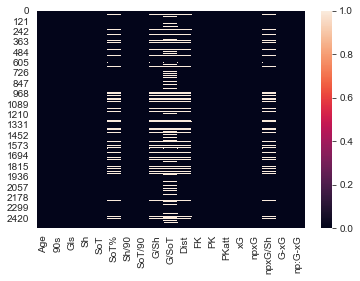

In [51]:
sns.heatmap(league_stats.iloc[:,2:].isna())

In [52]:
league_stats.fillna(value = 0, inplace = True)

<AxesSubplot:>

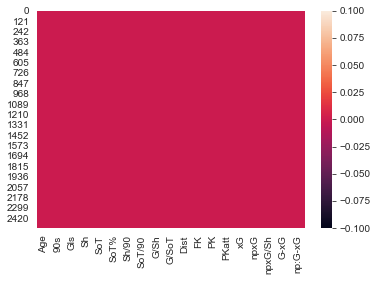

In [53]:
sns.heatmap(league_stats.iloc[:,2:].isna())

We do not need the last 4 columns for our regression. These are pre-existing projections, and we are clearly trying to project our own. But we can compare them with our own prediction

In [54]:
useful_stats = league_stats.iloc[:,:-4]

In [55]:
useful_stats.head()

Player Pos  Age   90s  Gls  Sh  SoT  SoT%  Sh/90  \
0  Pierre-Emerick Aubameyang  FW   30  34.8   22  90   40  44.4   2.58   
1                 David Luiz  DF   32  31.2    2  23    7  30.4   0.74   
2                 Bernd Leno  GK   27  29.4    0   0    0   0.0   0.00   
3               Granit Xhaka  MF   26  28.7    1  11    3  27.3   0.38   
4               Nicolas Pépé  FW   24  22.3    5  49   16  32.7   2.19   

   SoT/90  G/Sh  G/SoT  Dist  FK  PK  PKatt    xG  
0    1.15  0.22   0.50  15.3   2   2      2  15.8  
1    0.22  0.09   0.29  20.1   7   0      0   1.9  
2    0.00  0.00   0.00   0.0   0   0      0   0.0  
3    0.10  0.09   0.33  23.8   0   0      0   0.3  
4    0.72  0.08   0.25  19.4   7   1      1   4.5

In [56]:
useful_stats.rename(columns = {'Gls': 'Goals_Scored', 'Sh': 'Shots_Total', 'SoT': 'Shots_on_Target', 'SoT%': '%age_ShotsTarget','G/Sh': 'Goals/Shot'}, inplace = True)

# Categorical Columns: We have a total of 10 positional combinations. Let us assign them a goal scoring co-efficient based on how high up the field a combination places a player.

In [57]:
scoring_coef = {'GK': 0, 'DF': 1, 'DF,MF': 2, 'MF,DF': 2, 'DF,FW': 3, 
                'FW,DF': 3, 'MF': 4, 'FW,MF': 5, 'MF,FW': 5, 'FW': 6}

In [58]:
useful_stats['Pos'] = useful_stats['Pos'].map(scoring_coef)

In [59]:
useful_stats.head()

Player  Pos  Age   90s  Goals_Scored  Shots_Total  \
0  Pierre-Emerick Aubameyang    6   30  34.8            22           90   
1                 David Luiz    1   32  31.2             2           23   
2                 Bernd Leno    0   27  29.4             0            0   
3               Granit Xhaka    4   26  28.7             1           11   
4               Nicolas Pépé    6   24  22.3             5           49   

   Shots_on_Target  %age_ShotsTarget  Sh/90  SoT/90  Goals/Shot  G/SoT  Dist  \
0               40              44.4   2.58    1.15        0.22   0.50  15.3   
1                7              30.4   0.74    0.22        0.09   0.29  20.1   
2                0               0.0   0.00    0.00        0.00   0.00   0.0   
3                3              27.3   0.38    0.10        0.09   0.33  23.8   
4               16              32.7   2.19    0.72        0.08   0.25  19.4   

   FK  PK  PKatt    xG  
0   2   2      2  15.8  
1   7   0      0   1.9  
2   0   0      0   0.0  
3   0   0      0   0.3  
4   7   1      1   4.5

<Figure size 1080x576 with 0 Axes>

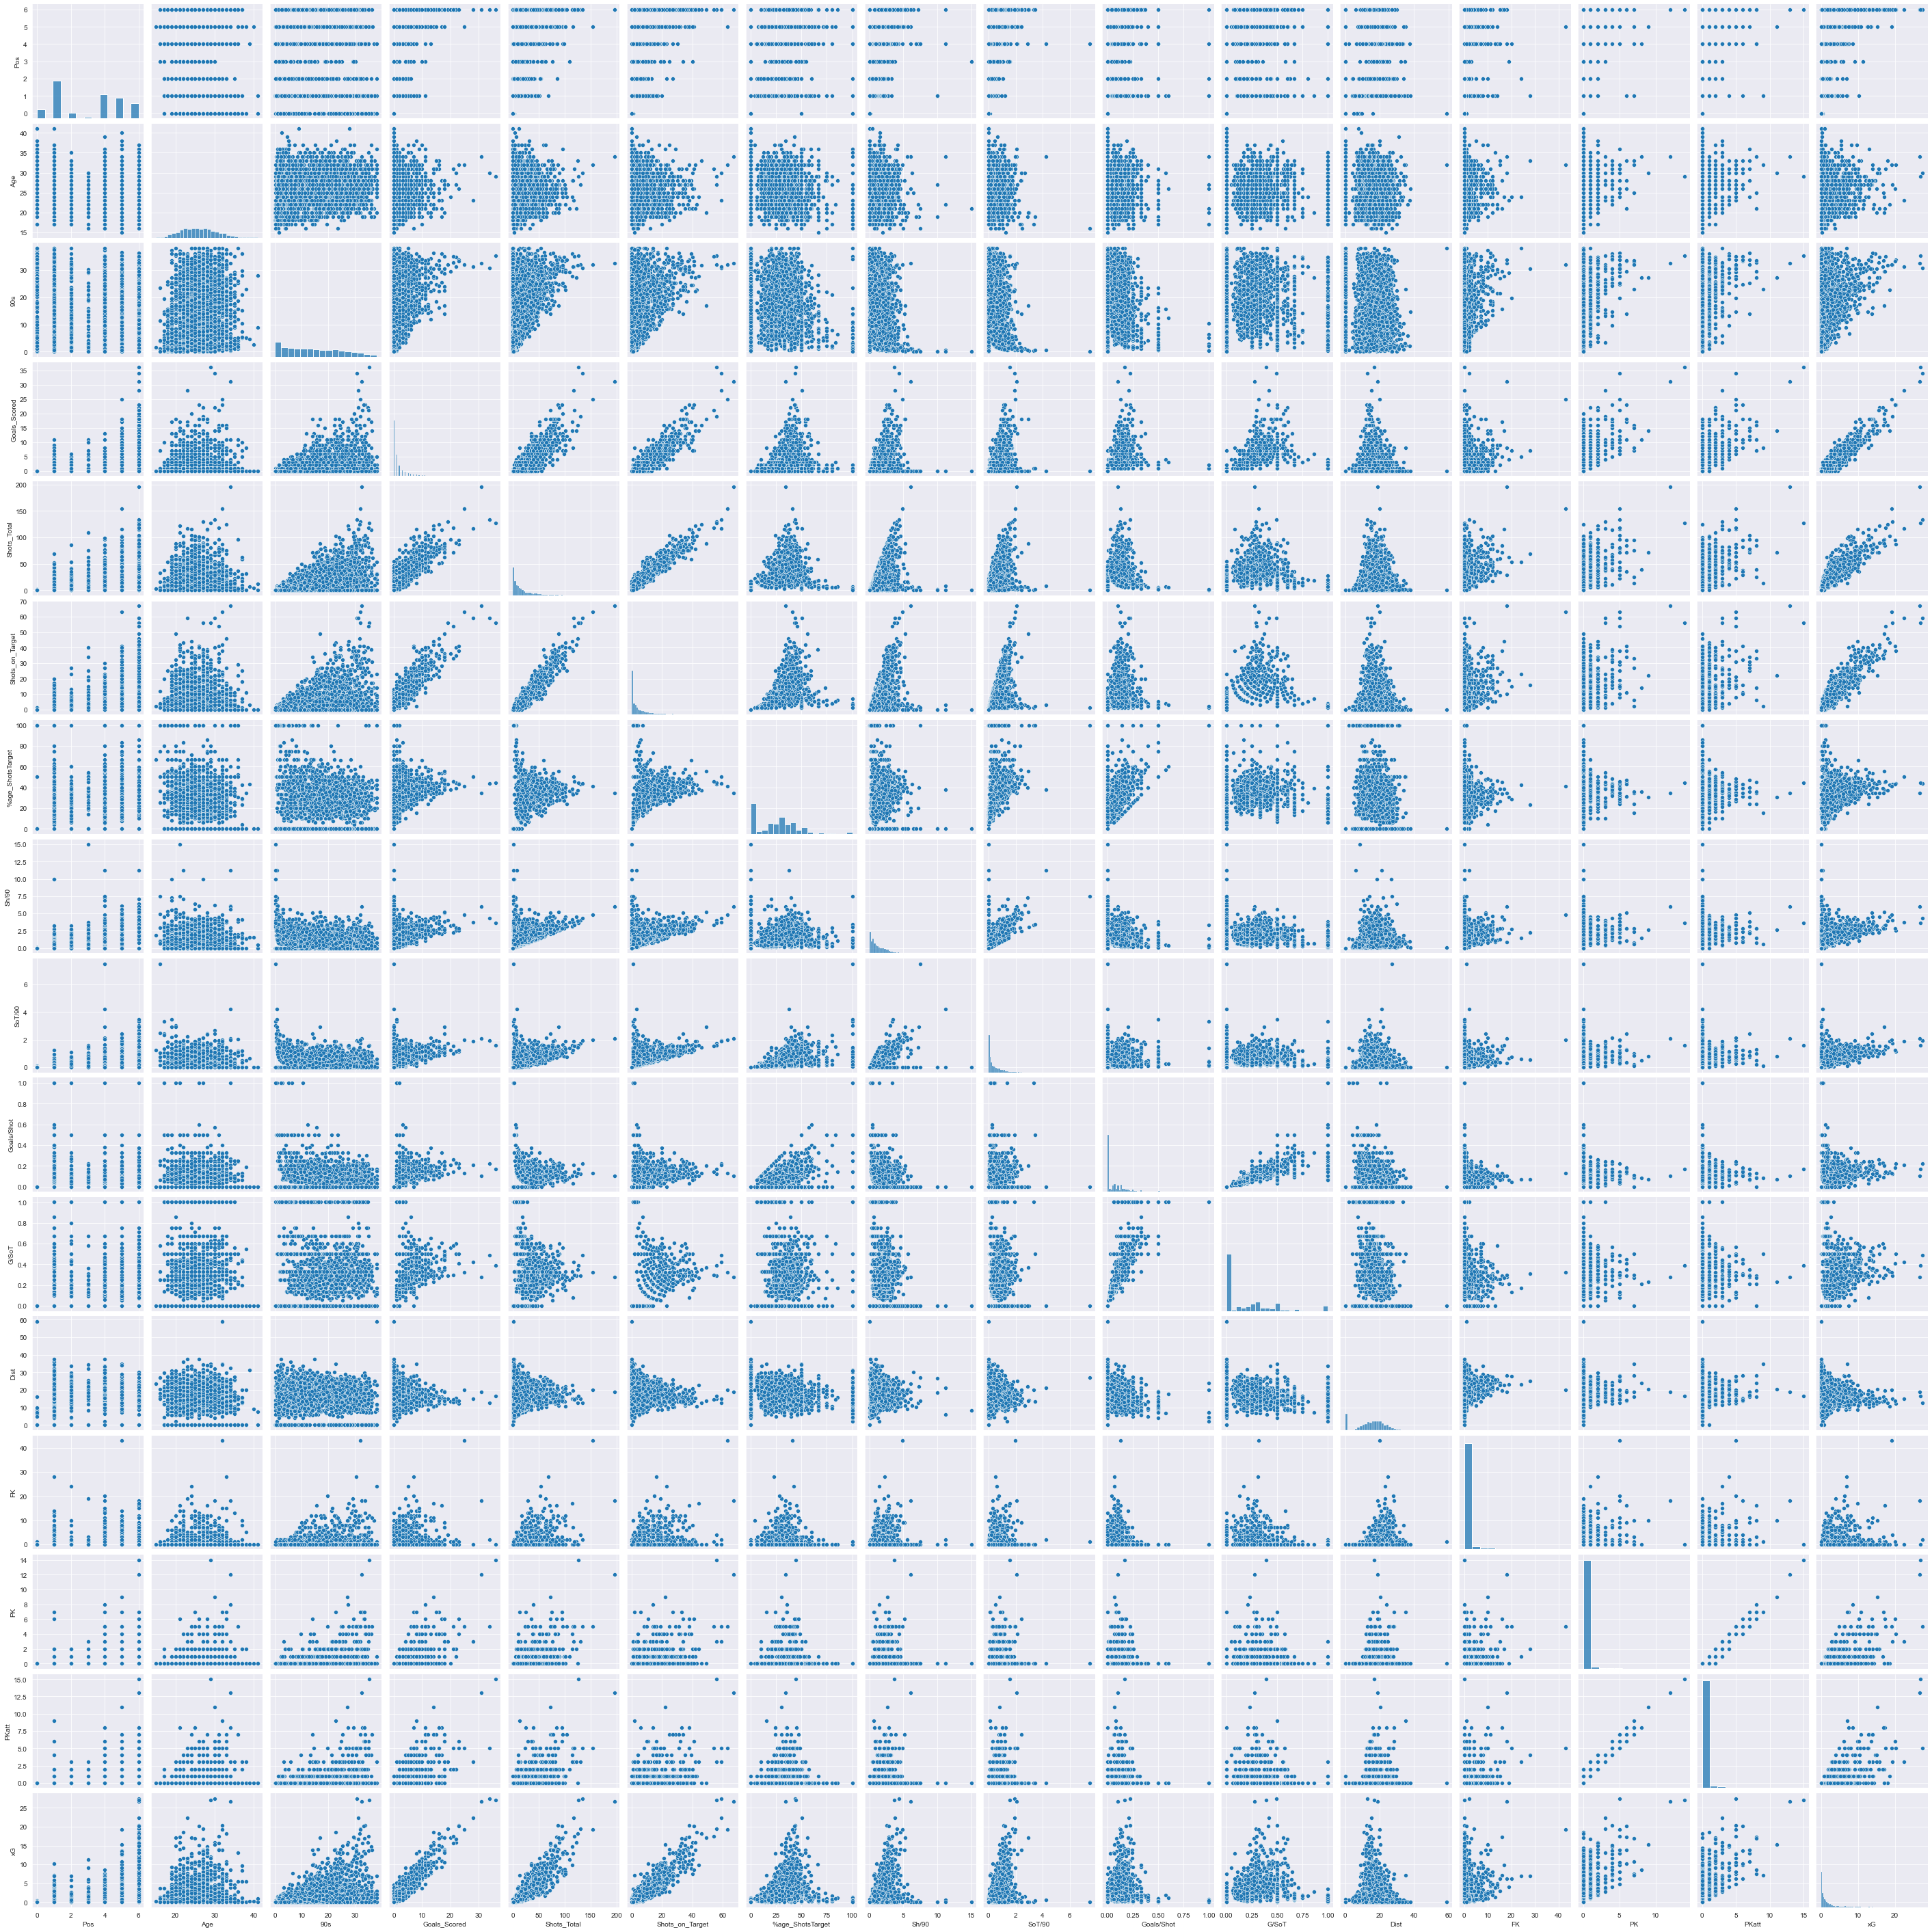

In [60]:
plt.figure(figsize = (15,8))
sns.pairplot(useful_stats.iloc[:,1:])

Exploring the inter-feature relationships:
There is clear multi-collinearity between 
Shots_Total vs Shots_on_Target, 
Shots/90 vs Shots on Target/90, 
Goals/Total Shots vs Goals/Total Shots on Target and 
Penalties Made(or scored) vs Penalties Attempted (which makes sense), Most penalty shots award result in a goal.

<AxesSubplot:>

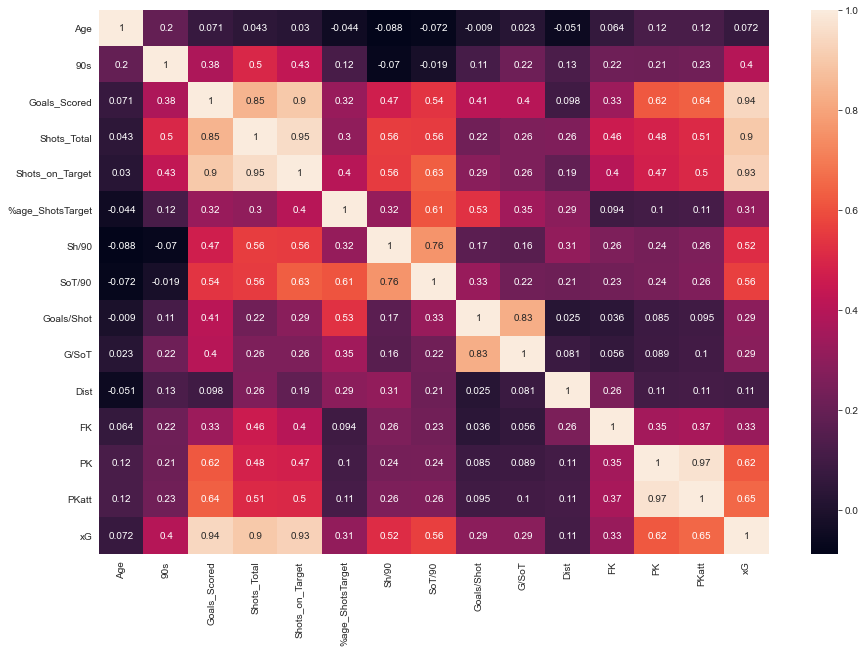

In [61]:
plt.figure(figsize = (15,10))
sns.heatmap(useful_stats.iloc[:,2:].corr(), annot = True)

In [62]:
final_stats = useful_stats.drop(['Shots_Total', 'Sh/90', 'Goals/Shot', 'G/SoT', 'FK', 'PKatt'], axis = 1)

<AxesSubplot:>

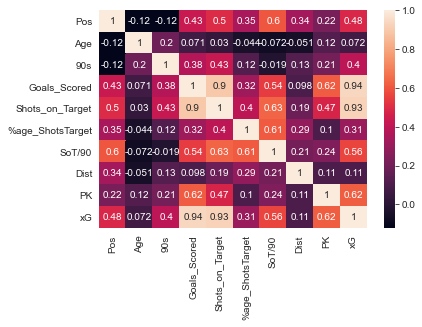

In [63]:
sns.heatmap(final_stats.corr(),annot = True)

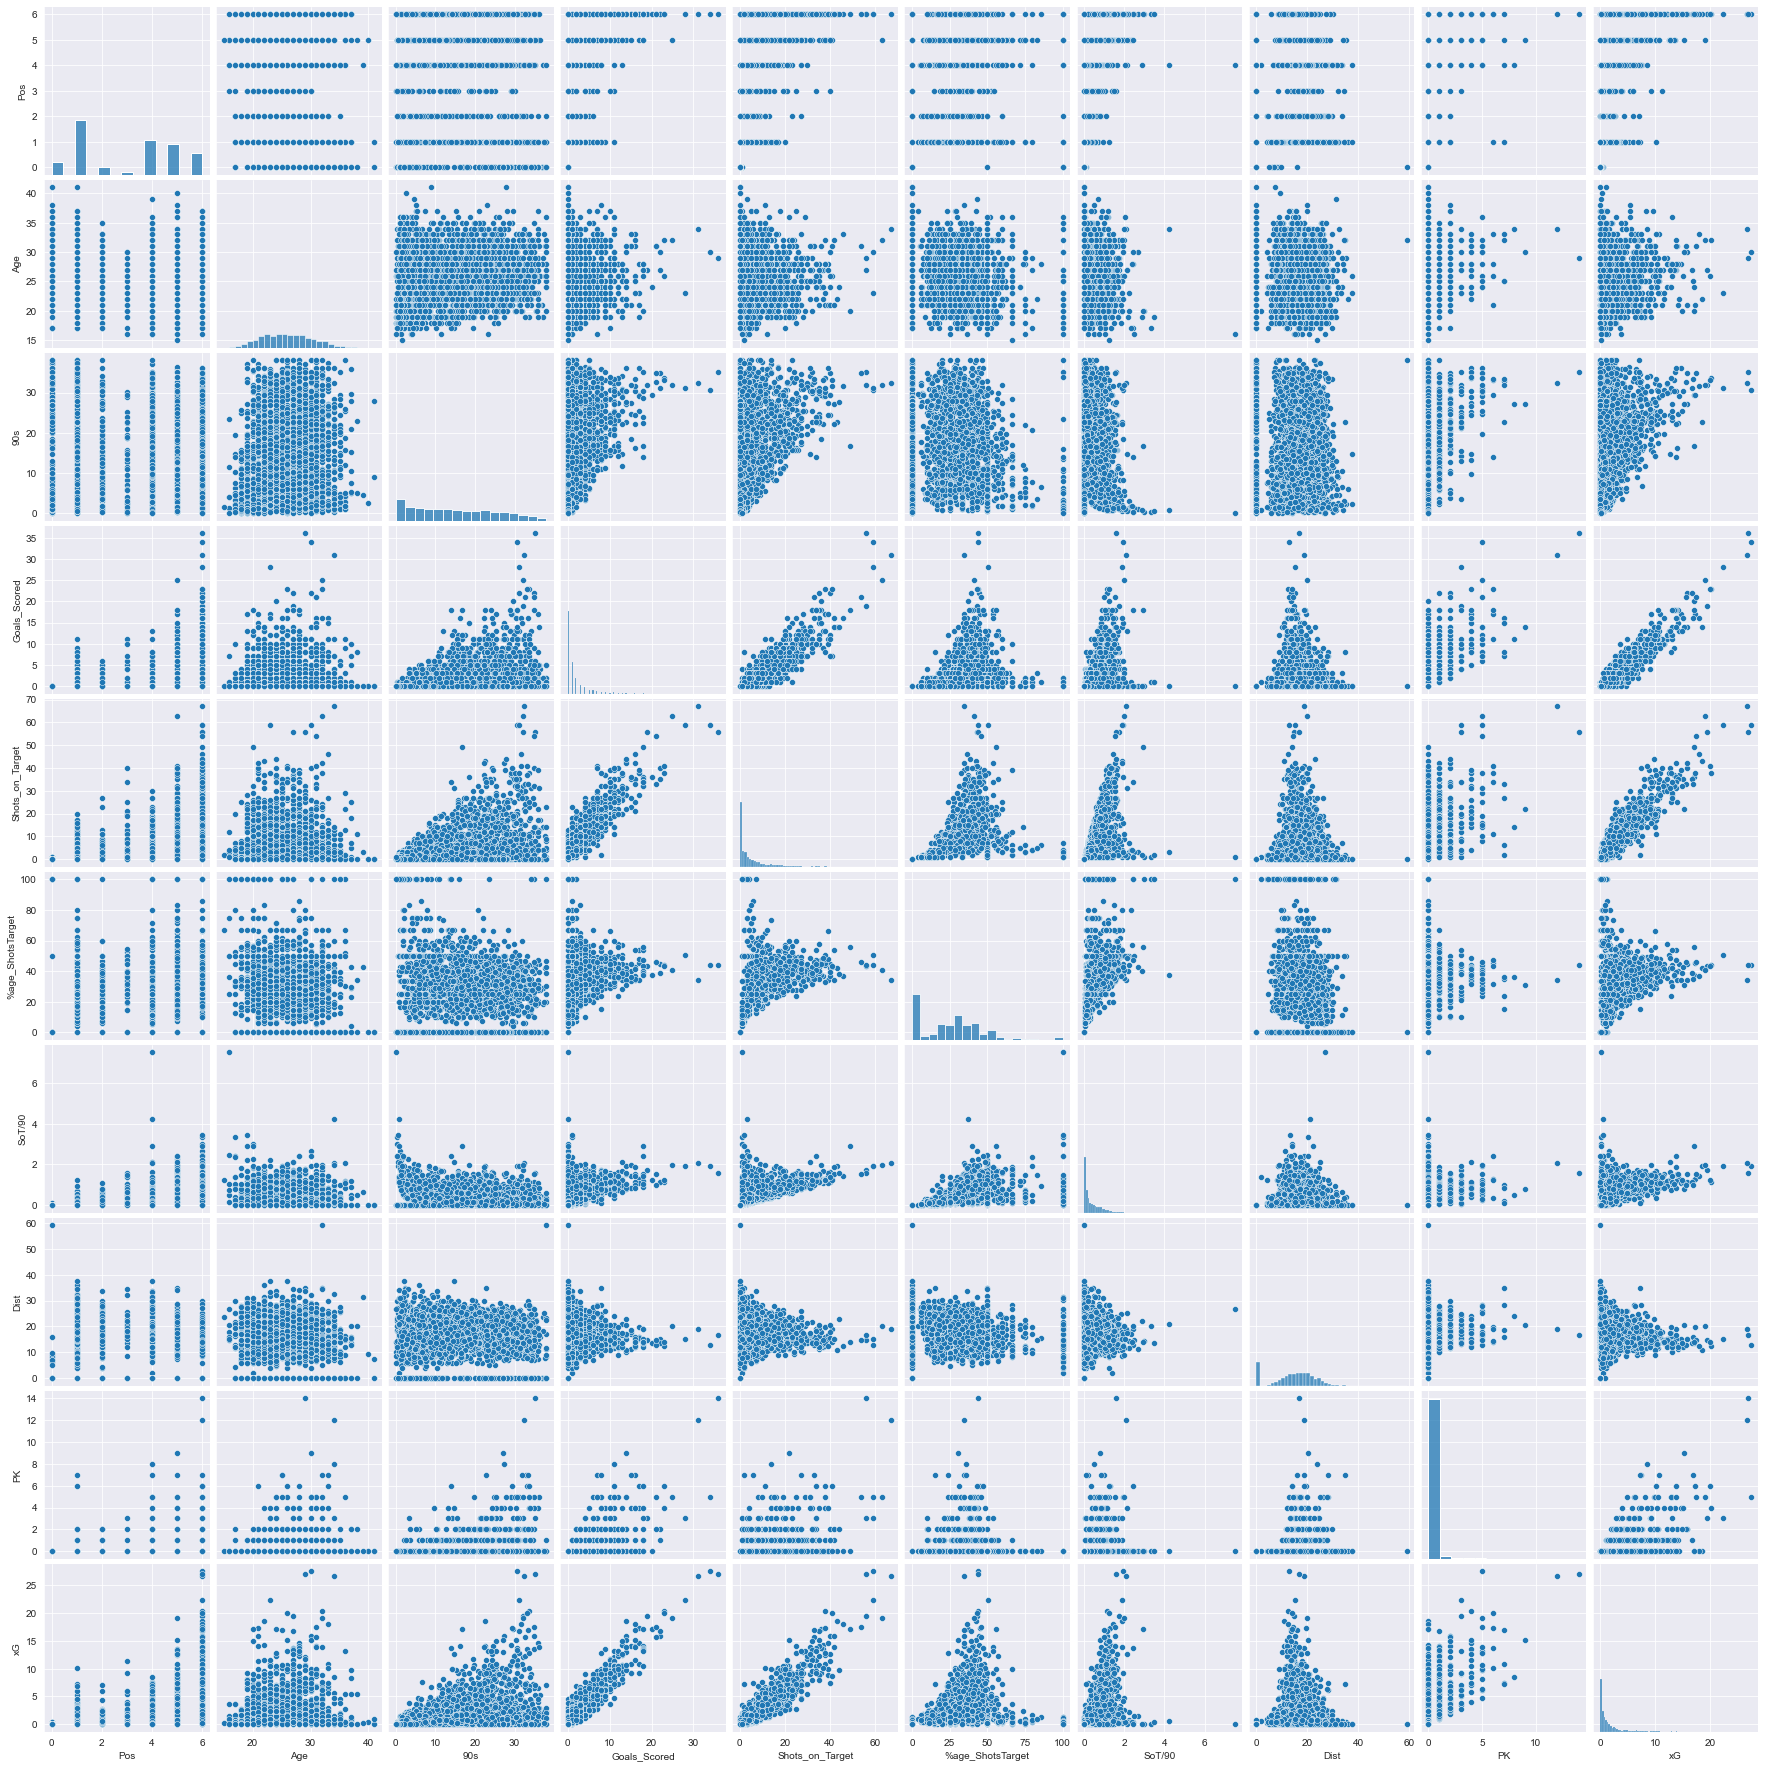

In [64]:
sns.pairplot(final_stats)

In [65]:
useful_stats.iloc[:,7:8] = useful_stats.iloc[:,7:8]/100

The pairplot and heatmap above do not include the age, yet. But in spite of an outlier, the age seems to be positively correlated with our target, 
Goals Scored, but only till ~26 to 27.

In [66]:
useful_stats.columns

Index(['Player', 'Pos', 'Age', '90s', 'Goals_Scored', 'Shots_Total',
       'Shots_on_Target', '%age_ShotsTarget', 'Sh/90', 'SoT/90', 'Goals/Shot',
       'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG'],
      dtype='object')

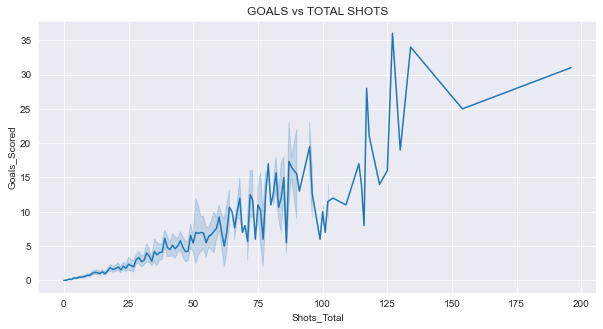

In [573]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Shots_Total', y = 'Goals_Scored', data = useful_stats)
plt.title('GOALS vs TOTAL SHOTS')
plt.savefig('goals_vs_shots.jpg')

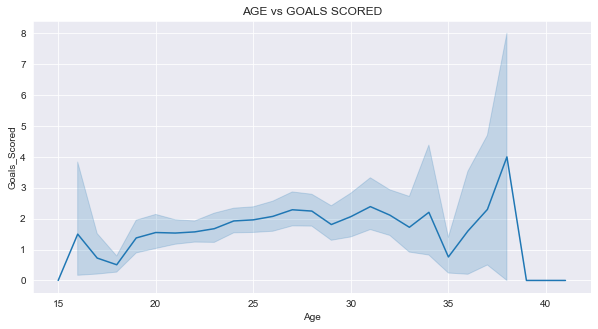

In [574]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Age', y = 'Goals_Scored', data = useful_stats)
plt.title('AGE vs GOALS SCORED')
plt.savefig('goals_vs_age.jpg')

# Our data is now ready for modelling. Our target or label is the Goals scored and our attributes are the various stats. Let us build our first model using our data and examine the outcome

# Model 1: Train 80%, test 20% , no validation set

In [432]:
X = useful_stats.drop(['Player', 'xG'], axis = 1)
y = useful_stats['xG']

In [433]:
from sklearn.linear_model import LinearRegression

In [434]:
from sklearn.model_selection import train_test_split

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [436]:
model1 = LinearRegression().fit(X_train,y_train)

In [437]:
print(model1.intercept_)
print('\n')
print(model1.coef_)

-0.11714466649468158


[ 0.06954423  0.009329    0.00175927  0.39373111  0.03759692  0.07714702
  0.07889693  0.05027404 -0.04518083 -0.74952808 -0.18566692 -0.02268868
 -0.09590088 -0.47076552  0.83535361]


In [438]:
model1.score(X_train, y_train)

0.950360813305055

In [439]:
model1.score(X_test, y_test)

0.9438682370610391

In [440]:
prediction1 = model1.predict(X_test)

<Figure size 1080x720 with 0 Axes>

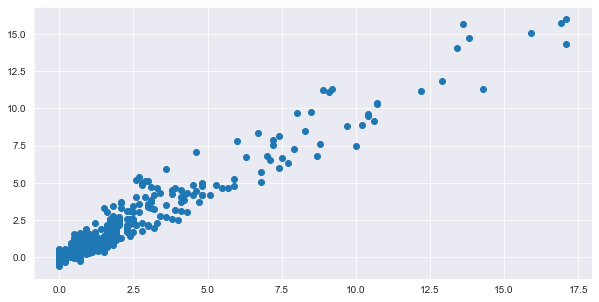

In [572]:
plt.figure(figsize=(15,10))
plt.figure(figsize = (10,5))
plt.scatter(y_test, prediction1)
np.polyfit(y_test, prediction1,1)
plt.savefig('scatter.jpg')



In [442]:
from sklearn import metrics

In [443]:
print('Train MAE: {}'.format(metrics.mean_absolute_error(y_test, prediction1)))
print('Train MSE: {}'.format(metrics.mean_squared_error(y_test, prediction1)))
print('Train RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction1))))

Train MAE: 0.44496562001766043
Train MSE: 0.445909651152729
Train RMSE: 0.6677646674935183


In [444]:
compare_df = pd.DataFrame({'Actual Goals': y_test, 'Predicted Goals': prediction1})

In [445]:
compare_df.head()

Actual Goals  Predicted Goals
1094           3.0         2.112307
2307           0.0        -0.141261
180            0.4         0.411605
1261           0.0         0.132065
320            1.2         0.769762

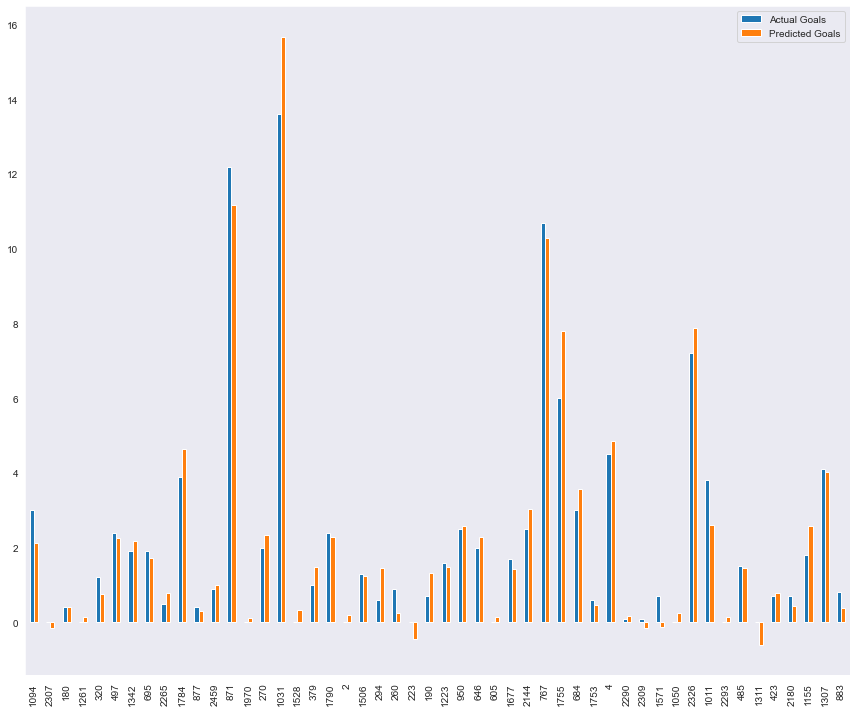

In [599]:
compare_df.head(50).plot(kind= 'bar', figsize = (12,10))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = '-', linewidth = '0.5', color = 'red')
plt.xticks(rotation = 90)
plt.savefig('prediction_bar.png')
plt.tight_layout();

<Figure size 864x576 with 0 Axes>

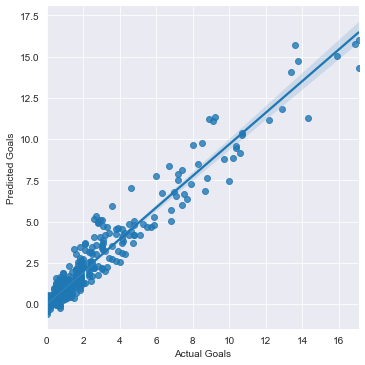

In [571]:
plt.figure(figsize = (12,8))
sns.lmplot(x = 'Actual Goals', y = 'Predicted Goals', data = compare_df)
plt.savefig('mvp_linefit.png')

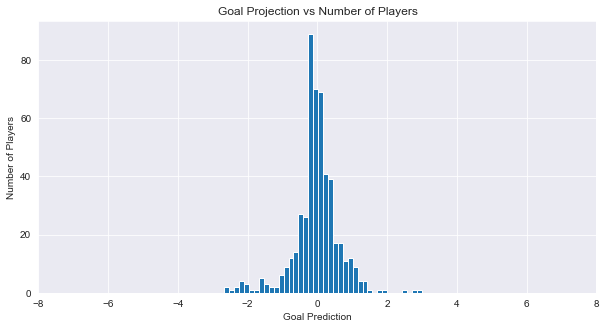

In [449]:
plt.figure(figsize = (10,5))
plt.hist(y_test - prediction1, bins = 40)
plt.xlim([-8,8])
plt.ylabel('Number of Players')
plt.xlabel('Goal Prediction')
plt.title('Goal Projection vs Number of Players')
plt.savefig('mvp_residuals.png');

In general, age does has an inverse impact on all athletes. Older players are slower and less prolific goal scorers than younger ones. As a coefficien of x, we need to invert the effect a player's age has on the resulting y-prediction. We'll create an age coefficient using 16, the legal professional age in European Football as a baseline.

In [450]:
useful_stats.head()

Player  Pos  Age   90s  Goals_Scored  Shots_Total  \
0  Pierre-Emerick Aubameyang    6   30  34.8            22           90   
1                 David Luiz    1   32  31.2             2           23   
2                 Bernd Leno    0   27  29.4             0            0   
3               Granit Xhaka    4   26  28.7             1           11   
4               Nicolas Pépé    6   24  22.3             5           49   

   Shots_on_Target  %age_ShotsTarget  Sh/90  SoT/90  Goals/Shot  G/SoT  Dist  \
0               40             0.444   2.58    1.15        0.22   0.50  15.3   
1                7             0.304   0.74    0.22        0.09   0.29  20.1   
2                0             0.000   0.00    0.00        0.00   0.00   0.0   
3                3             0.273   0.38    0.10        0.09   0.33  23.8   
4               16             0.327   2.19    0.72        0.08   0.25  19.4   

   FK  PK  PKatt    xG  
0   2   2      2  15.8  
1   7   0      0   1.9  
2   0   0      0   0.0  
3   0   0      0   0.3  
4   7   1      1   4.5

In [451]:
#MEAN AGE OF ALL GOALKEEPERS
useful_stats[useful_stats.Pos == 0].Age.mean()

27.925

In [452]:
#MEAN AGE OF ALL MIDFIELDERS & STRIKERS
useful_stats[useful_stats.Pos >= 4].Age.mean()

25.172155688622755

In [453]:
#Mean Age all MIDFIELDERS AND FORWARDS WITH 15 GOALS OR MORE:
useful_stats[(useful_stats.Pos >= 4) & (useful_stats.Goals_Scored >= 15)].Age.mean()

27.542857142857144

In [454]:
#MEAN AGE OF MIDFIELDERS AND FORWARDS WITH 15 GOALS OR MORE AND ARE OLDER THAN 28
useful_stats[(useful_stats.Pos >= 4) & (useful_stats.Goals_Scored >= 15)&(useful_stats.Age >= 31)].Age.mean()


31.90909090909091

# Model 2: Train 60%, validate 20% and test 20%

In [455]:
X2 = useful_stats.drop(['Player', 'xG'], axis = 1)
y2 = useful_stats['xG']

In [456]:
#Split dataset into two portions: train-size=80%, test-size = 20% 
X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=40)

In [457]:
#Split the 80% train-set into a further  train 80: test 20 
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_val, y2_train_val, test_size=0.25, random_state=40)

In [458]:
model2 = LinearRegression().fit(X2_train, y2_train)

In [459]:
model2.score(X2_train, y2_train)

0.9498588321285968

In [460]:
print('Initial test_score: {}'.format(model1.score(X_test, y_test)))
print('Validation score: {}'.format(model2.score(X2_val, y2_val)))

Initial test_score: 0.9438682370610391
Validation score: 0.9508428506149045


In [461]:
#Predict on the validation

prediction2 = model2.predict(X2_val)

In [462]:
print('y-Intercept: {}'.format(model2.intercept_))
print('\n')
print('Coefficients: {}'.format(model2.coef_))


y-Intercept: -0.07370685628377527


Coefficients: [ 6.53988860e-02  8.78480829e-03 -2.92751432e-04  4.00211000e-01
  3.97221639e-02  7.71918868e-02  1.41320408e-01  4.54485579e-02
 -1.12950708e-01 -9.59773826e-01 -1.48848662e-01 -2.32998538e-02
 -9.29473267e-02 -6.10049713e-01  9.16778669e-01]


In [463]:
print('Validation MAE: {}'.format(metrics.mean_absolute_error(y2_val, prediction2)))
print('Validation MSE: {}'.format(metrics.mean_squared_error(y2_val, prediction2)))
print('Validation RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y2_val, prediction2))))

Validation MAE: 0.4164324923382953
Validation MSE: 0.41830390523490024
Validation RMSE: 0.6467641805441148


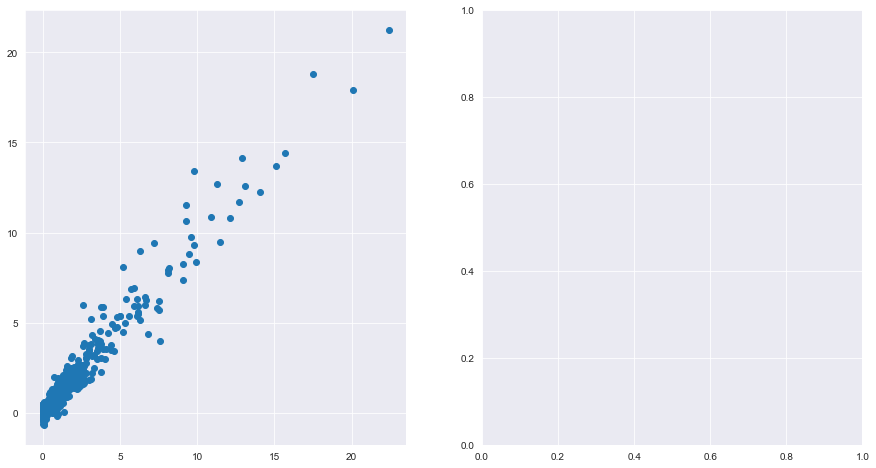

In [464]:
#Visualize
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
axes[0].scatter(y2_val, prediction2)
#sns.lmplot(axes[1], x = y2_val, y = prediction2)
#sns.lmplot(ax = axes[1], x = y2_val, y = prediction2)
#axes[0].set_ylabel('Goals Predicted')
#axes[0].set_title('ACTUAL GOALS SCORED vs PREDICTED GOALS')
#axes[1].set_title('BEST LINE: VALIDATION1')

# Since our dataset is relatively small, a cross validation could really benefit our model

In [189]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [465]:
X3 = useful_stats.drop(['Player', 'xG'], axis = 1)
y3 = useful_stats['xG']
X3, X3_test, y3, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 10)
X3, y3 = np.array(X3), np.array(y3)

In [466]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
simple_list, ridge_list = [], []
for train, val in kf.split(X3,y3):
    X3_train, y3_train = X3[train], y3[train]
    X3_val, y3_val = X3[val], y3[val]
    
    lm = LinearRegression()
    lm_ridge = Ridge(alpha = 1)
    lm.fit(X3_train, y3_train)
    simple_list.append(lm.score(X3_val, y3_val))
    
    scaler = StandardScaler()
    X3_train_scaled = scaler.fit_transform(X3_train)
    X3_val_scaled = scaler.transform(X3_val)
    lm_ridge.fit(X3_train_scaled, y3_train)
    ridge_list.append(lm_ridge.score(X3_val_scaled, y3_val))

print('Simple Regression Scores: {} '.format(simple_list))
print('Ridge Scores: {}'.format(ridge_list))
print('\n')
print('Simple Mean CV R^2: {:.3f}'.format(np.mean(simple_list) +- np.std(simple_list)))
print('Simple Ridge Mean CV R^2: {:.3f}'.format(np.mean(ridge_list) +- np.std(ridge_list)))


Simple Regression Scores: [0.9500682970589562, 0.9660418121514731, 0.9526246664720038, 0.9357705671412477, 0.929639655588837] 
Ridge Scores: [0.9499808470036325, 0.9661131099895087, 0.9526830605672884, 0.935762913714945, 0.929695575095413]


Simple Mean CV R^2: 0.934
Simple Ridge Mean CV R^2: 0.934


In [467]:
print('The earlier validation scores were significantly higher by comparison!')
print('\n')
print('Initial test_score: {}'.format(model1.score(X_test, y_test)))
print('Validation score: {}'.format(model2.score(X2_val, y2_val)))

The earlier validation scores were significantly higher by comparison!


Initial test_score: 0.9438682370610391
Validation score: 0.9508428506149045


Let us take a look at the test scores FROM THE CROSS VALIDATION:

In [468]:
predict_cross = lm.predict(X3_test)

In [469]:
lm.score(X3_test, y3_test)

0.942941832449386

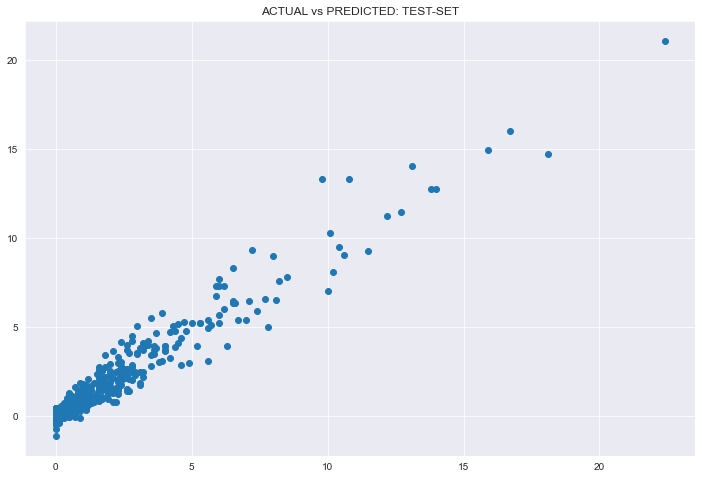

In [470]:
plt.figure(figsize = (12,8))
plt.title('ACTUAL vs PREDICTED: TEST-SET')
plt.scatter(y3_test, predict_cross)

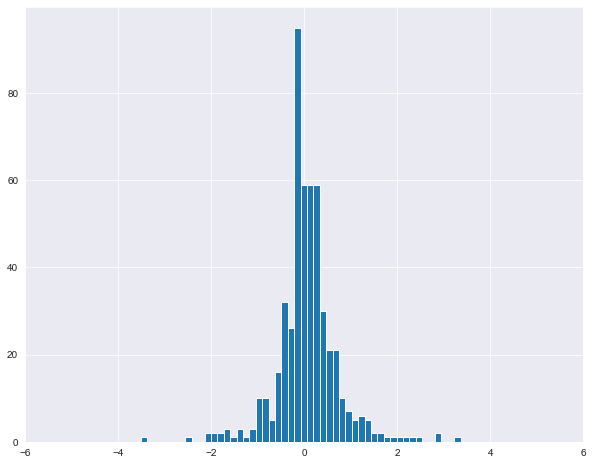

In [471]:
plt.figure(figsize = (10,8))
plt.hist(y3_test - predict_cross, bins = 50)
plt.xlim([-6, 6]);

In [472]:
#Fit the model to the entire dataset:


In [473]:
lm.fit(X3, y3)

LinearRegression()

In [474]:
lm.score(X3,y3)

0.9504767592080936

In [475]:
full_prediction = lm.predict(X3)

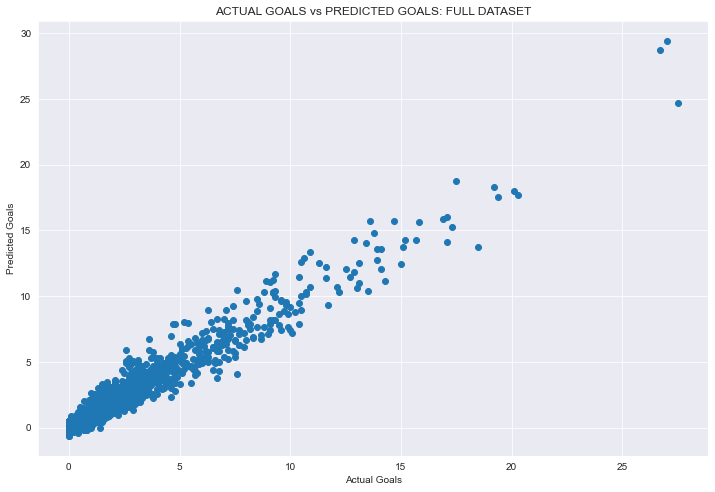

In [476]:
plt.figure(figsize = (12,8))
plt.title('ACTUAL GOALS vs PREDICTED GOALS: FULL DATASET')
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.scatter(y3, full_prediction);

In [ ]:
sns.

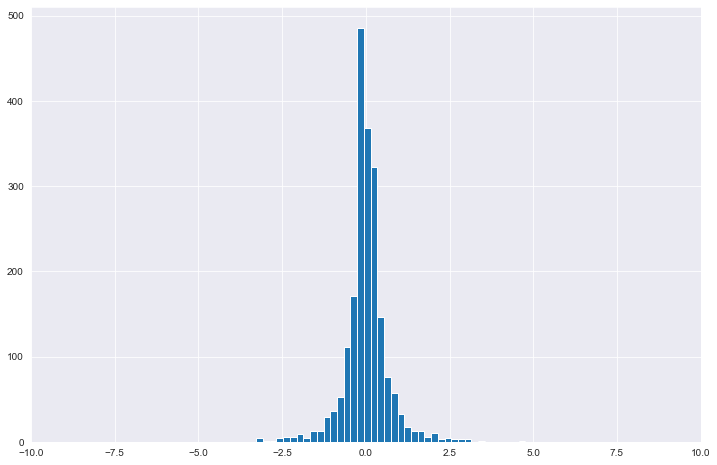

In [478]:
plt.figure(figsize = (12,8))
plt.hist(y3 - full_prediction, bins = 40)
plt.xlim([-10,10]);

# Apply the Ridge model to the full dataset

In [479]:
X3_scaled = scaler.fit_transform(X)
X3_test_scaled = scaler.transform(X3_test)

lm_ridge = Ridge(alpha=1)
lm_ridge.fit(X3_scaled,y)

print('Ridge Regression test R^2: {:.3f}'.format(lm_ridge.score(X3_scaled, y)))

Ridge Regression test R^2: 0.949


In [480]:
ridge_prediction = lm_ridge.predict(X3_scaled)

In [481]:
print('Ridge MAE: {}'.format(metrics.mean_absolute_error(y, ridge_prediction)))
print('Ridge MSE: {}'.format(metrics.mean_squared_error(y, ridge_prediction)))
print('Ridge RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y, ridge_prediction))))

Ridge MAE: 0.4297272542672771
Ridge MSE: 0.4363462489595817
Ridge RMSE: 0.6605650981997018


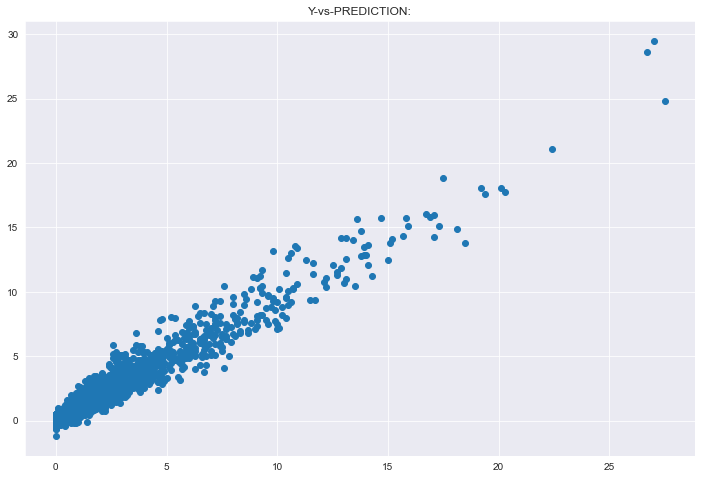

In [579]:
plt.figure(figsize = (12,8))
plt.scatter(y, ridge_prediction)
plt.title('Y-vs-PREDICTION:')
plt.savefig('scatter1')

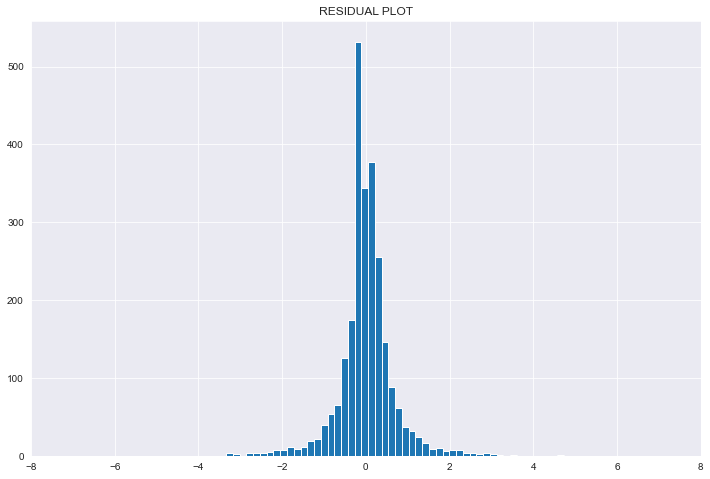

In [581]:
plt.figure(figsize = (12,8))
plt.hist(y-ridge_prediction, bins = 50)
plt.xlim([-8,8])
plt.title('RESIDUAL PLOT')
plt.savefig('residual.jpg');

# let us use the model on some players using data from the current season: 2020-2021

In [486]:
url = "https://fbref.com/en/squads/19538871/Manchester-United-Stats"
response = requests.get(url)
response.status_code

200

In [487]:
page = response.text
soup = BeautifulSoup(page, 'html.parser')

In [488]:
shooting_table = soup.find(id = 'stats_shooting_10728')

In [489]:
manutd = shooting_table.find_all('tr')

In [490]:
stats_dict = {}
for row in manutd[2:-2]:
    
    row_data = []
    data = row.find_all('td')
    for data_entry in data:
        row_data.append(data_entry.text)
    stats_dict[row.find('th').text] = row_data
    



In [491]:
manutd_df = pd.DataFrame.from_dict(stats_dict, orient = 'index')

In [492]:
manutd_df.to_csv('manutd20_21.csv')

In [493]:
mutd_df = pd.read_csv('manutd20_21.csv')

In [494]:
mutd_df.head()

Unnamed: 0        0   1       2     3   4   5   6     7     8  ...  \
0      Harry Maguire  eng ENG  DF  28-042  31.0   2  32   9  28.1  1.03  ...   
1    Bruno Fernandes   pt POR  MF  26-220  29.3  16  86  34  39.5  2.93  ...   
2  Aaron Wan-Bissaka  eng ENG  DF  23-141  29.0   2   8   4  50.0  0.28  ...   
3    Marcus Rashford  eng ENG  FW  23-167  28.0  10  66  32  48.5  2.36  ...   
4          Luke Shaw  eng ENG  DF  25-278  24.5   1   8   5  62.5  0.33  ...   

     12  13  14  15    16   17    18   19   20       21  
0  11.1   0   0   0   1.8  1.8  0.06  0.2  0.2  Matches  
1  22.8  11   8   9  13.0  6.2  0.07  3.0  1.8  Matches  
2  15.5   0   0   0   0.9  0.9  0.11  1.1  1.1  Matches  
3  18.1   4   0   0   8.2  8.2  0.12  1.8  1.8  Matches  
4  17.0   0   0   0   0.5  0.5  0.06  0.5  0.5  Matches  

[5 rows x 23 columns]

In [495]:
mutd_df.columns = team_columns

In [520]:
united2021 = mutd_df.iloc[:,:-5]

In [521]:
united2021.Age = united2021.Age.apply(lambda x: x.split('-')[0])

In [522]:
united2021.Age = pd.to_numeric(united2021['Age'])

In [524]:
united2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  25 non-null     object 
 1   Nation  25 non-null     object 
 2   Pos     25 non-null     object 
 3   Age     25 non-null     int64  
 4   90s     25 non-null     float64
 5   Gls     25 non-null     int64  
 6   Sh      25 non-null     int64  
 7   SoT     25 non-null     int64  
 8   SoT%    19 non-null     float64
 9   Sh/90   25 non-null     float64
 10  SoT/90  25 non-null     float64
 11  G/Sh    19 non-null     float64
 12  G/SoT   17 non-null     float64
 13  Dist    19 non-null     float64
 14  FK      25 non-null     int64  
 15  PK      25 non-null     int64  
 16  PKatt   25 non-null     int64  
 17  xG      25 non-null     float64
dtypes: float64(8), int64(7), object(3)
memory usage: 3.6+ KB


In [525]:
united2021.Pos = united2021.Pos.map(scoring_coef)

In [526]:
united2021.rename(columns = {'Gls': 'Goals_Scored', 'Sh': 'Shots_Total', 'SoT': 'Shots_on_Target', 'SoT%': '%age_ShotsTarget','G/Sh': 'Goals/Shot'}, inplace = True)

In [527]:
united2021.drop(['Nation'], axis = 1, inplace = True)

In [362]:
# Let us apply the model on Manchester United's top 10 2020-21

In [537]:
X_m = united2021.drop(['Player','xG'], axis = 1)
y_m = united2021['xG']

<AxesSubplot:>

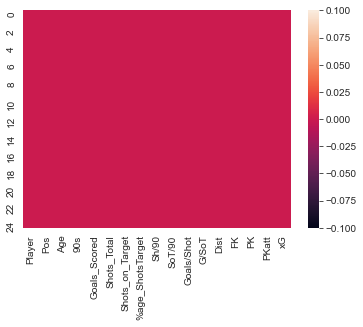

In [538]:
sns.heatmap(united2021.isna())

In [539]:
united2021.fillna(value = 0, inplace = True)

<AxesSubplot:>

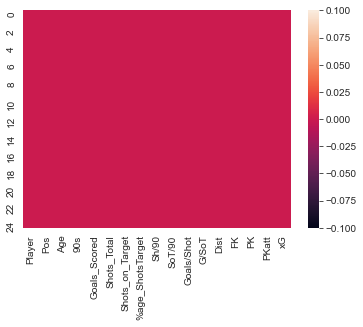

In [540]:
sns.heatmap(united2021.isna())

In [597]:
united2021.head(10)

Player  Pos  Age   90s  Goals_Scored  Shots_Total  \
0      Harry Maguire    1   28  31.0             2           32   
1    Bruno Fernandes    4   26  29.3            16           86   
2  Aaron Wan-Bissaka    1   23  29.0             2            8   
3    Marcus Rashford    6   23  28.0            10           66   
4          Luke Shaw    1   25  24.5             1            8   
5    Victor Lindelöf    1   26  23.7             1            4   
6       David de Gea    0   30  23.5             0            0   
7               Fred    4   28  22.4             1           24   
8    Scott McTominay    4   24  19.0             4           20   
9         Paul Pogba    5   28  16.9             3           24   

   Shots_on_Target  %age_ShotsTarget  Sh/90  SoT/90  Goals/Shot  G/SoT  Dist  \
0                9              28.1   1.03    0.29        0.06   0.22  11.1   
1               34              39.5   2.93    1.16        0.09   0.24  22.8   
2                4              50.0   0.28    0.14        0.25   0.50  15.5   
3               32              48.5   2.36    1.14        0.15   0.31  18.1   
4                5              62.5   0.33    0.20        0.13   0.20  17.0   
5                1              25.0   0.17    0.04        0.25   1.00   5.9   
6                0               0.0   0.00    0.00        0.00   0.00   0.0   
7                6              25.0   1.07    0.27        0.04   0.17  22.0   
8                6              30.0   1.05    0.32        0.20   0.67  17.6   
9               10              41.7   1.42    0.59        0.13   0.30  15.4   

   FK  PK  PKatt    xG  
0   0   0      0   1.8  
1  11   8      9  13.0  
2   0   0      0   0.9  
3   4   0      0   8.2  
4   0   0      0   0.5  
5   0   0      0   0.7  
6   0   0      0   0.0  
7   0   0      0   1.9  
8   0   0      0   1.3  
9   0   0      0   1.7

In [592]:
lm.score(X_m, y_m)

-0.30865778884687667

In [542]:
pred_manu = lm.predict(X_m)

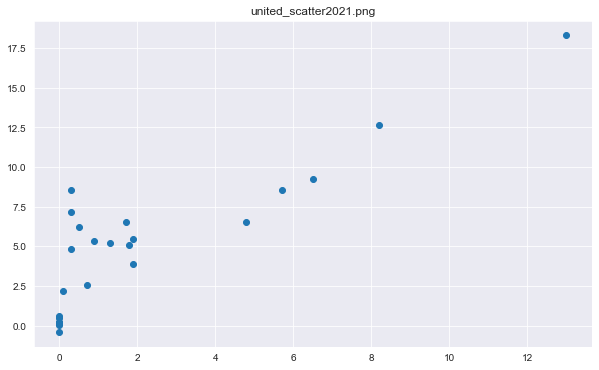

In [619]:

plt.figure(figsize = (10,6))
plt.scatter(y_m, pred_manu)
plt.title('united_scatter2021.png')
plt.savefig('united scatter2021.png')

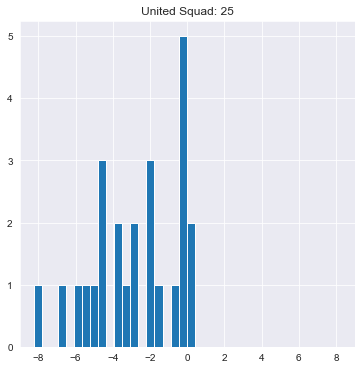

In [617]:
plt.figure(figsize = (6,6))
plt.hist(y_m - pred_manu, bins = 20 )
plt.title('United Residual')
plt.xlim([-9, 9])
plt.title('United Squad: 25')
plt.savefig('united_residuals2021.jpg');

In [548]:
lm.score(X_m, y_m)

-0.30865778884687667

In [546]:
comparison = pd.DataFrame({'xG Known': y_m, 'xG Predicted': pred_manu})

In [595]:
comparison.head(20)

xG Known  xG Predicted
0        1.8      5.101378
1       13.0     18.305184
2        0.9      5.335414
3        8.2     12.655609
4        0.5      6.221740
5        0.7      2.574727
6        0.0      0.194047
7        1.9      3.863270
8        1.3      5.184824
9        1.7      6.523092
10       6.5      9.215337
11       4.8      6.508534
12       5.7      8.560310
13       0.3      4.809166
14       1.9      5.488571
15       0.0      0.128751
16       0.0      0.004250
17       0.1      2.148338
18       0.3      7.144351
19       0.3      8.563488

In [607]:
comparison = pd.merge(comparison, united2021, on = [comparison.index == united2021.index])[['Player', 'xG Known', 'xG Predicted']]

In [615]:
comparison.head(20)

Player  xG Known  xG Predicted
0       Harry Maguire       1.8      5.101378
1     Bruno Fernandes       1.8      5.101378
2   Aaron Wan-Bissaka       1.8      5.101378
3     Marcus Rashford       1.8      5.101378
4           Luke Shaw       1.8      5.101378
5     Victor Lindelöf       1.8      5.101378
6        David de Gea       1.8      5.101378
7                Fred       1.8      5.101378
8     Scott McTominay       1.8      5.101378
9          Paul Pogba       1.8      5.101378
10    Anthony Martial       1.8      5.101378
11    Mason Greenwood       1.8      5.101378
12     Edinson Cavani       1.8      5.101378
13      Nemanja Matić       1.8      5.101378
14       Daniel James       1.8      5.101378
15     Dean Henderson       1.8      5.101378
16        Eric Bailly       1.8      5.101378
17        Alex Telles       1.8      5.101378
18          Juan Mata       1.8      5.101378
19  Donny van de Beek       1.8      5.101378

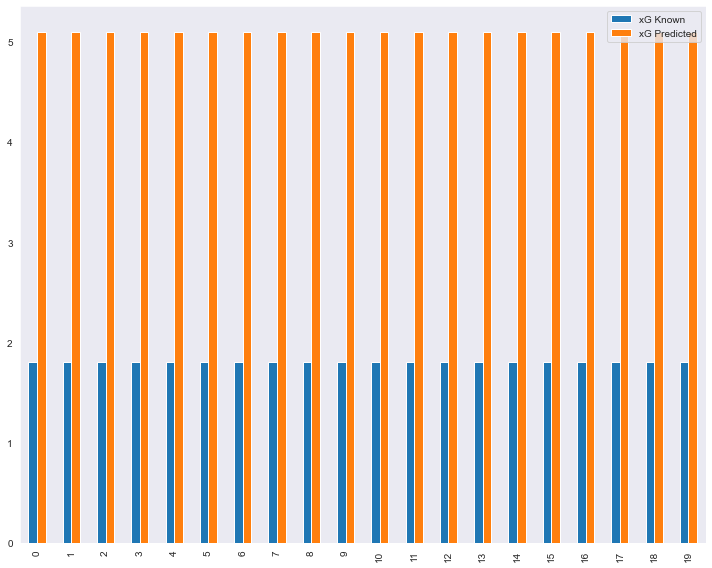

In [625]:
comparison.head(20).plot(kind = 'bar', figsize = (10,8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = '-', linewidth = '0.5', color = 'red')
plt.xticks(rotation = 90)
plt.savefig('comparison_united.png')
plt.tight_layout();


# Let us apply the ridge model

In [549]:
lm_ridge.score(X_m, y_m)

-104.13216935019804

In [551]:
pred_manu1 = lm_ridge.predict(X_m)

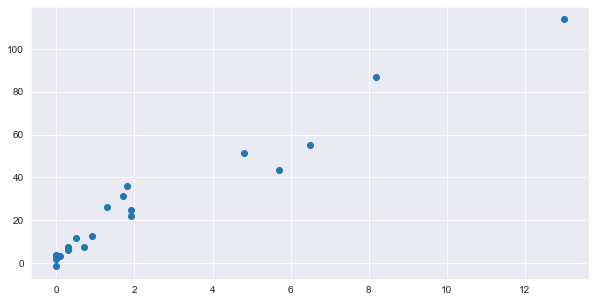

In [554]:
plt.figure(figsize = ((10,5)))
plt.scatter(y_m, pred_manu1)

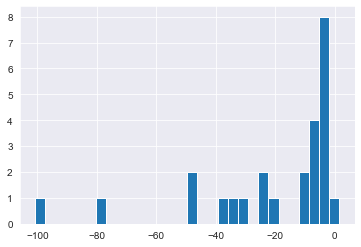

In [558]:
plt.hist(y_m - pred_manu1, bins = 30);